# 0 - Information

# 1 - Packages

In [1]:
# Keras packages
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, GlobalAveragePooling2D
from keras.optimizers import SGD, Adam
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K

# Graphics packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Progress bar
from tqdm import tqdm

# Personal packages
from myfunctions import *

Using TensorFlow backend.


# Exercice 1: Monte-Carlo Dropout

## a) Dropout

## 1.a.1 - Constant Variables

In [2]:
NB_CLASSES = 10
BATCH_SIZE = 100
NB_EPOCH = 20

## 1.a.2 - Architecture of the Model

In [3]:
class CNN(object):
    
    def __init__(self, dropout=True, verbose=1, batch_size=BATCH_SIZE, nb_epoch=NB_EPOCH):
        """Initialisation of the CNN parameters."""
        
        # Attribute for the architecture
        self.dropout = dropout
        
        # Attributes for the training
        self.batch_size = batch_size
        self.nb_epoch = nb_epoch
        self.verbose = verbose
        
        # Build the model
        self.build()
        
    def build(self):
        """Build the architecture of the model."""

        input_shape = (28, 28, 1)
        self.model = Sequential()
        self.model.add(Conv2D(16, kernel_size=(5, 5),  activation='relu',
                              input_shape=input_shape, padding='valid' ))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Conv2D(32, (5, 5), activation='relu', padding='valid'))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        self.model.add(Flatten())
        
        # Add Dropout if specified
        if self.dropout:
            self.model.add(Dropout(0.25))
            
        self.model.add(Dense(100, activation='sigmoid'))
        
        # Add Dropout if specified
        if self.dropout:
            self.model.add(Dropout(0.5))
            
        self.model.add(Dense(NB_CLASSES, activation='softmax'))
        
        # Definition of the compiler of the neural network
        self.model.compile(loss='categorical_crossentropy', optimizer=Adam(),
                           metrics=['accuracy'])
        
    def fit(self, X_train, Y_train, X_test=None, Y_test=None):
        """fit the model."""
        
        if not(X_test is None) and not(Y_test is None):
            history = self.model.fit(X_train, Y_train,
                                     batch_size=self.batch_size, epochs=self.nb_epoch,
                                     verbose=self.verbose,
                                     validation_data=(X_test, Y_test))
        else:
            history = self.model.fit(X_train, Y_train,
                                     batch_size=self.batch_size, epochs=self.nb_epoch,
                                     verbose=self.verbose)
        
        return history
    
# Instantiate a CNN
cnn_model = CNN()

## 1.a.3 - Summary of the model

In [4]:
cnn_model.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               51300     
__________

## 1.a.4 - Training of the model

In [5]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

# Reshape and normalise the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Train the network
history = cnn_model.fit(x_train, Y_train, x_test, Y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.4925 - acc: 0.8546 - val_loss: 0.1047 - val_acc: 0.9697
Epoch 2/20
60000/60000 [==============================] - 5s 89us/step - loss: 0.1593 - acc: 0.9566 - val_loss: 0.0673 - val_acc: 0.9799
Epoch 3/20
60000/60000 [==============================] - 5s 92us/step - loss: 0.1161 - acc: 0.9666 - val_loss: 0.0506 - val_acc: 0.9848
Epoch 4/20
60000/60000 [==============================] - 6s 94us/step - loss: 0.0916 - acc: 0.9739 - val_loss: 0.0373 - val_acc: 0.9881
Epoch 5/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0775 - acc: 0.9778 - val_loss: 0.0331 - val_acc: 0.9897
Epoch 6/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0689 - acc: 0.9804 - val_loss: 0.0304 - val_acc: 0.9904
Epoch 7/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0627 - acc: 0.9816 - val_loss: 0.0282 - val_ac

## 1.a.5 - Assesment of the model

In [6]:
# Scores on the training set
scores = cnn_model.model.evaluate(x_train, Y_train, verbose=0)
print("TRAIN: %s: %.2f%%" % (cnn_model.model.metrics_names[0], scores[0]*100))
print("TRAIN: %s: %.2f%%" % (cnn_model.model.metrics_names[1], scores[1]*100))

# Scores on the testing set
scores = cnn_model.model.evaluate(x_test, Y_test, verbose=0)
print("TEST: %s: %.2f%%" % (cnn_model.model.metrics_names[0], scores[0]*100))
print("TEST: %s: %.2f%%" % (cnn_model.model.metrics_names[1], scores[1]*100))

# Total number of error for the testing dataset
nberr = int(round((1.0 - scores[1]) * x_test.shape[0]))
print("nb err dropout="+str(nberr))

TRAIN: loss: 0.91%
TRAIN: acc: 99.71%
TEST: loss: 2.07%
TEST: acc: 99.32%
nb err dropout=68


In [7]:
def displayMetrics():
    """Display the mertices over the different iterations with and without dropout."""
    
    # Definition of the possible dropouts
    dropout_l = [False, True]
    
    # Initialisation of the resulting figures
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))
    
    for i in tqdm(range(2)):
        
        # Dropout
        dropout = dropout_l[i]
        
        # Instantiate a CNN
        cnn_model_i = CNN(dropout=dropout, verbose=0)

        # Train the network
        history_i = cnn_model_i.fit(x_train, Y_train, x_test, Y_test)

        # Display thye metrics
        for j, key in enumerate(list(history.history.keys())[2: ]):
    
            # Plot loss & accuracy values
            axs[i, j].plot(history_i.history[key], label="Training Set")
            axs[i, j].plot(history_i.history["val_" + key], label="Test Set")
            
            # Parameter of the figure
            axs[i, j].set_title('Dropout: {}, Metric: {}'.format(dropout, key))
            axs[i, j].set_ylabel(key)
            axs[i, j].set_xlabel('Epoch')
            axs[i, j].legend()
        
        
    # Show the figure
    plt.show()

100%|██████████| 2/2 [03:58<00:00, 115.97s/it]


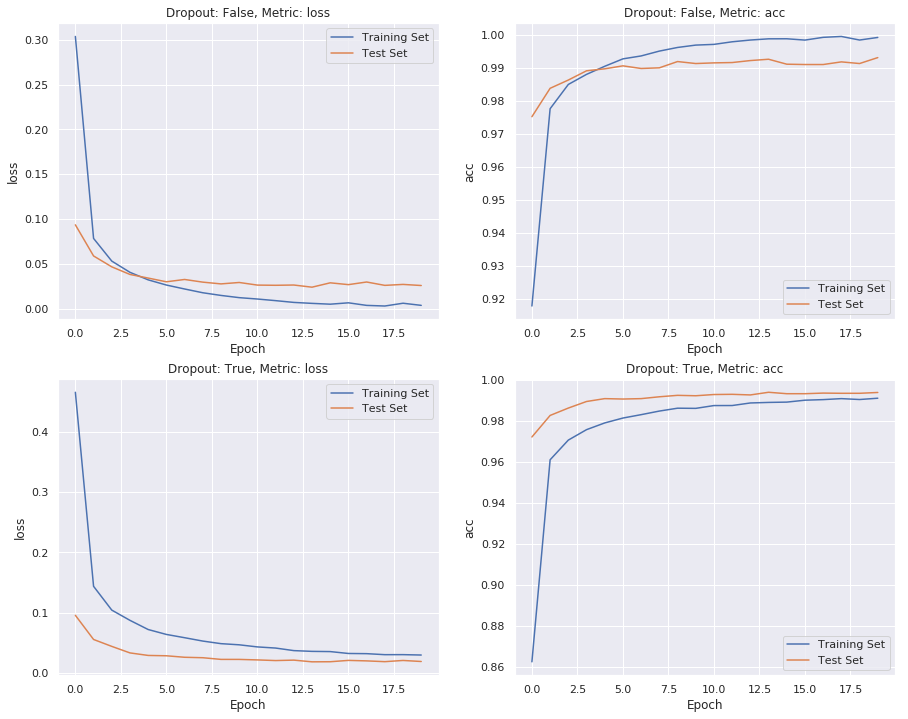

In [8]:
displayMetrics()

Commentaires:
-------------

* Dans le TP 1, nou avions utilisé la même architecture mais sans dropout. Nous avions obtenu une présicion proche de 99.2% pour le testing set. Avec le dropout, la précision a augmenté à 99.3%. Cependant, ceci c'est fait au prix d'un accroissement du nombre d'époques d'entraînement. Le vrai avatange du dropout se trouve au niveau de l'overfitting. En particulier, on peut l'observer sur les figures ci-dessus (cf figures du bas) où à la fois la loss et la précision sur le Testing Set sont cette fois meilleure que sans Dropout.

* Augmenter le nombre d'époques étaient à la fois souhaitable (pas d'over-fitting comme on vient de le voir) mais aussi nécessaire car du fait de l'aléatoire des dropouts, la convergence du réseau de neurones est potentiellement plus instable, c'est pourquoi des époques supplémentaires peuvent être nécessaires. Comme on le peut voir sur les figures ci-dessus, la convergence est plus rapide sans Dropout mais le maximum atteint est moins bon.

## 1.a.6 - Save the Model

In [9]:
saveModel(cnn_model.model, "./Results/CNN_Model")

Yaml Model  ./Results/CNN_Model .yaml saved to disk
Weights  ./Results/CNN_Model .h5 saved to disk


## b) Monte Carlo Sampling

In [10]:
# Load the model
model = loadModel("./Results/CNN_Model")

# Number of Monte Carlo samples
nS = 1000

# Definition of the new model
MC_output = K.function([model.layers[0].input, K.learning_phase()], [model.layers[-1].output])
learning_phase = True  # use dropout at test time

# Compute nS predictions for the testing set
MC_samples = [MC_output([x_test, learning_phase])[0] for _ in range(nS)]
MC_samples = np.array(MC_samples)

# Save predictions for the testing set with Dropout
outfile = './Results/MC_predictions'
np.savez(outfile, MC_samples=MC_samples)

Yaml Model  ./Results/CNN_Model .yaml loaded 
Weights  ./Results/CNN_Model .h5 loaded 


In [11]:
# Extract the predictions for the maximal probability
predictions = np.mean(MC_samples, axis=0)
y_preds = np.argmax(predictions, axis=1)

# Count the number of error
nberr_S = np.where(y_preds != y_test, 1.0, 0.0).sum()
print("Nb errors MC dropout= " + str(nberr_S))

Nb errors MC dropout= 70.0


Commentaires:
------------------

On obtient donc ll'erreur moyenne de l'estimation MC: $ 70 / 1000 = 7 \%$

# Exercice 2 : Visualisation d’exemples incertains

## 2.1 - Definitoon of the model

In [12]:
# LOADING MODEL
nameModel = "./Results/CNN_Model"
model = loadModel(nameModel)
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Yaml Model  ./Results/CNN_Model .yaml loaded 
Weights  ./Results/CNN_Model .h5 loaded 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_______________________________________________________

## 2.2 - Loading of the data

In [13]:
# Lading of the MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Loading MC Predictions
outfile = './Results/MC_predictions.npz'
npzfile = np.load(outfile)
MC_samples = npzfile['MC_samples']
nS = MC_samples.shape[0]

## 2.3 - Evaluation of the Model

In [14]:
# EVALUATING MODEL
scores = model.evaluate(x_train, Y_train, verbose=0)
print("TRAIN: %s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("TRAIN: %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

scores = model.evaluate(x_test, Y_test, verbose=0)
print("TEST: %s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("TEST: %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

nberr = int(round((1.0 - scores[1])*10000))

TRAIN: loss: 0.91%
TRAIN: acc: 99.71%
TEST: loss: 2.07%
TEST: acc: 99.32%


## 2.4 - Computation of the Variation ratio

In [15]:
# Shape of x_test
nb_test, _, _, _ = x_test.shape

# Compute for every image and every samples the predictions
am = np.argmax(MC_samples, axis=2)

# Compute the histogram for every images of the predictions
hists = [np.histogram(am[:, i], range=(0, 10)) for i in range(nb_test)]

# Compute the variation ratio for every image
fx = np.array([np.max(hists[x][0]) / nS for x in range(nb_test)])
vr = 1.0 - fx

## 2.5 - Uncertain images

In [16]:
def showUncertainty(MC_sample, hist, img, title):
    """Show the uncertainity of classification of the images given in argument."""
    
    # Size of the labels
    size = 6
    
    # Compute the frequency of each classification for the given image
    pred_mean = MC_sample.mean(axis=0)
    
    # Display the image
    fig = plt.figure(dpi=150)
    fig.suptitle(title, fontsize="x-large")
    fig.set_figheight(4)
    fig.set_figwidth(4 * 5)
    ax = plt.subplot(161)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
    # Display the histograms
    ax = plt.subplot(162)
    ax.bar(range(10), pred_mean)
    ax.set_title("Mean Pred")
    ax.set_xticks(range(10))
    # Customise the size of the labels
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +\
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(size)
    
    
    # Display the histograms of the predictions
    ax = plt.subplot(163)
    ax.bar(range(10), hist)
    ax.set_title("Samples Pred")
    ax.set_xticks(range(10))
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +\
                 ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(size)
    
    # Sort the predictions
    asorted = np.argsort(pred_mean, axis=0)
    
    # Display the histogram of probability of predcitons for
    # the 3 most probable classification
    h1 = np.histogram(MC_sample[:, asorted[9]], range=(0.0, 1.0))
    h2 = np.histogram(MC_sample[:, asorted[8]], range=(0.0, 1.0))
    h3 = np.histogram(MC_sample[:, asorted[7]], range=(0.0, 1.0))
    
    # X labels
    x_range = np.array([i / 10 for i in range(10)])

    # Display h1
    ax = plt.subplot(164)
    ax.bar(x_range, h1[0], width=0.08)
    ax.set_title("Class_" + str(asorted[9]))
    ax.set_yticks(np.arange(0, nS, 10))
    ax.set_xticks(x_range)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(size)
    
    # Display h2
    ax = plt.subplot(165)
    ax.bar(x_range, h2[0], width=0.08)
    ax.set_title("Class_" + str(asorted[8]))
    ax.set_yticks(np.arange(0, nS, 10))
    ax.set_xticks(x_range)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(size)
    
    # Display h3
    ax = plt.subplot(166)
    ax.bar(x_range, h3[0], width=0.08)
    ax.set_title("Class_" + str(asorted[7]))
    ax.set_yticks(np.arange(0, nS, 10))
    ax.set_xticks(x_range)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(size)
    
    # Display the result
    plt.show()

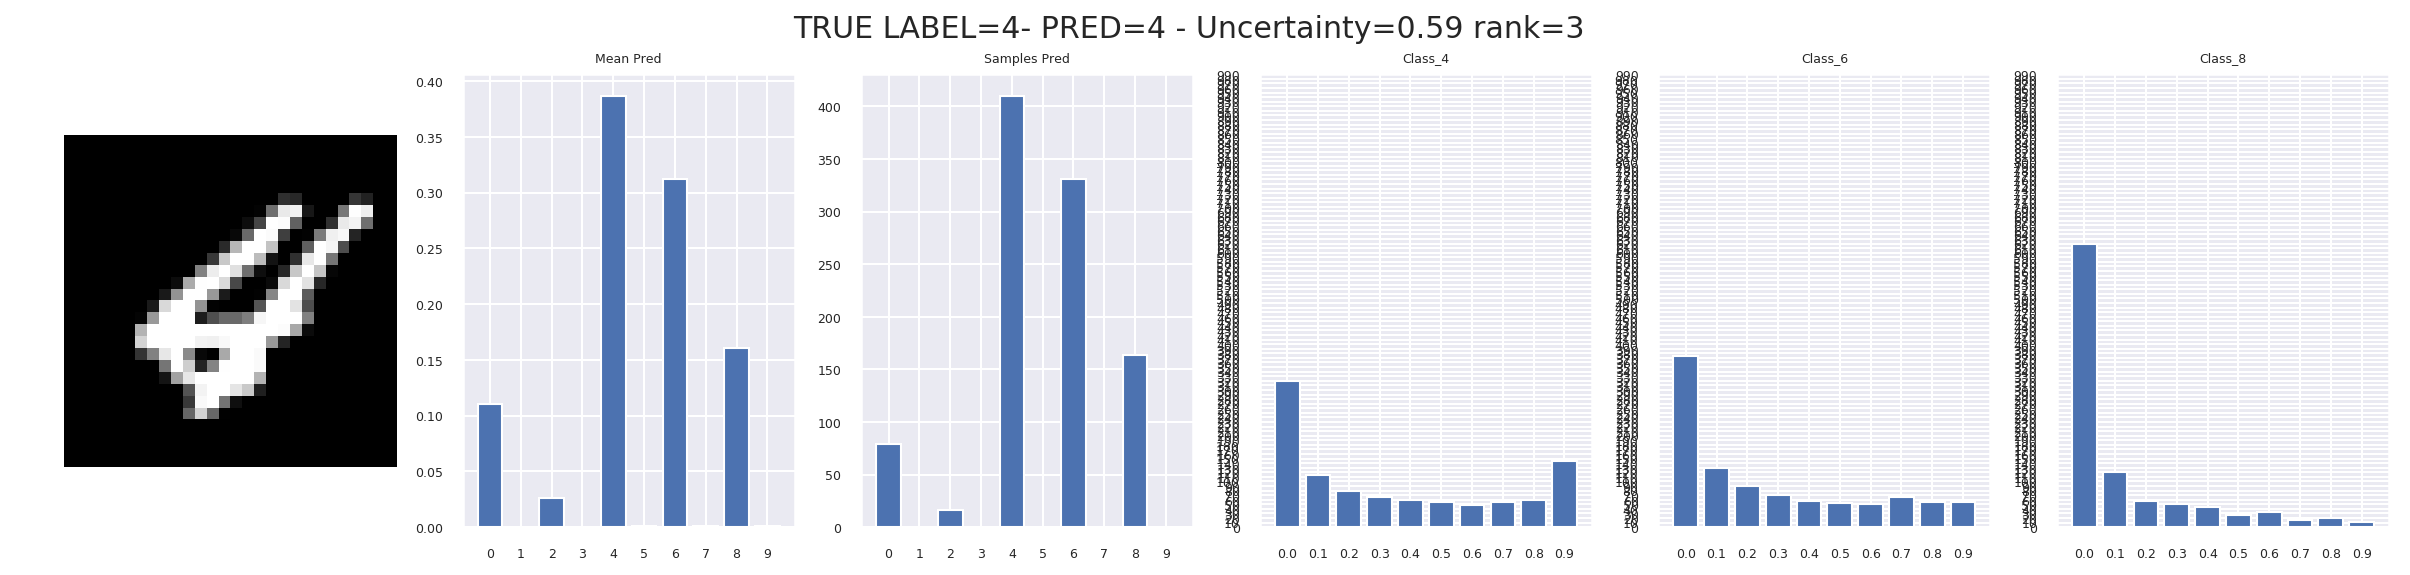

next example ? (0 to stop) - 0


In [17]:
# Sort the samples according to their uncertainity of predictions
uncertain_samples = fx.argsort()

# Compute the prediction according to the argmax of MC
predictions = np.mean(MC_samples, axis=0)
y_preds = np.argmax(predictions, axis=1)

# Range among the uncertain images in which to extract images of test
min = 0
max = 10

# Stopping criterion
bStop = False

while bStop == False:
    
    # Extract random index of uncertain images
    cpt = np.random.randint(min, max)
    index = uncertain_samples[cpt]
    
    # Display the uncertainity for this images
    title = "TRUE LABEL=" + str(y_test[index]) + "- PRED=" + str(y_preds[index]) +\
            " - Uncertainty=" + str("{:0.2f}".format(vr[index])) + " rank=" + str(cpt)
    showUncertainty(MC_samples[:, index, :], hists[index][0],
                    x_test[index, :, :, 0].reshape([28,28]), title)

    entry = int(input("next example ? (0 to stop) - "))
    if entry == 0:
        bStop = True

Commentaires:
------------------
Décrivons les histogrammes ci-dessus:
* 1) représente la probabilité de prédictions pour chaque classe pour l'exemple étudié.
* 2) représente le nombre de fois samples où une classe donnée était prédite.
* 3, 4 et 5) représentent un histogramme des probabilités de classification pour les trois classes les plus probables.

On peut aussi remarquer que lorsque on prend des exemples pour lesquel l'incertitude est plus faible, la classification tend vers un Dirac correspondant à la classification correcte.

# Exercice 3: Apprentissage Actif et Incertitude

## 3.1 - Define the model

In [18]:
# Instantiate the model
cnn_model_3 = CNN(verbose=0, batch_size=20, nb_epoch=100)

## 3.2 - Build a Training set

In [19]:
def ActiveSets(x_train=x_train, Y_train=Y_train):
    """Define the Active Sets."""

    # Saving array
    idstart = []

    #  Extract two samples per classes
    for c in range(NB_CLASSES):
        a = list(np.where(y_train == c)[0])
        idstart.append(a[0])
        idstart.append(a[1])

    # Initialisation of the Active Set
    nb_active_ex = 20
    X_active = np.empty(x_train.shape)
    Y_active = np.empty(Y_train.shape)

    # Fill active set with first nbActive examples
    X_active[0:nb_active_ex, :, :, :] = x_train[idstart, :, :, :]
    Y_active[0:nb_active_ex, :] = Y_train[idstart, :]

    # Delete the selected examples from the training set
    mask = np.ones(x_train.shape[0], dtype=bool)
    mask[idstart] = False
    x_train = x_train[mask]
    Y_train = Y_train[mask]
    
    return X_active, Y_active, nb_active_ex

In [20]:
# Definition of the active sets
X_active, Y_active, nb_active_ex = ActiveSets()

## 3.3 - Training of the model

In [21]:
# Fitting of the model
cnn_model_3.fit(X_active[0:nb_active_ex,:], Y_active[0:nb_active_ex,:])

# Evaluating model in active set and test set
scores = cnn_model_3.model.evaluate(X_active[0:nb_active_ex, :],
                                    Y_active[0:nb_active_ex,:], verbose=1)
print("TRAIN: %s: %.2f%%" % (cnn_model_3.model.metrics_names[1], scores[1]*100))

scores = cnn_model_3.model.evaluate(x_test, Y_test, verbose=0)
print("TEST: %s: %.2f%%" % (cnn_model_3.model.metrics_names[1], scores[1]*100))
nb_err = int(round((1.0 - scores[1]) * x_test.shape[0]))
print("nb err dropout="+str(nb_err))

20/20 [==============================] - 0s 8ms/step
TRAIN: acc: 100.00%
TEST: acc: 66.79%
nb err dropout=3321


In [22]:
def ActiveLearning(sampling_strategy=0, filename='./Results/Random',
                   nb_err=nb_err, nb_active_ex=nb_active_ex,
                   x_train=x_train, Y_train=Y_train):
    """Active Learning of the NN."""
    
    # Number of examples to add at each iteration
    nb_add = 100

    # Number of times to add examples
    nb_active_it = 10

    # Saving array of errors
    errors = np.zeros(nb_active_it + 1)
    errors[0] = nb_err

    for it in tqdm(range(nb_active_it)):

        if(sampling_strategy==0):
            # Select examples in a random order
            uncertain_samples = np.random.choice(range(x_train.shape[0]), x_train.shape[0],
                                                 replace=False)
            
        else:
            # Select examples according to their variation ratio
            uncertain_samples = sampling_strategy(cnn_model_3.model, x_train)

        # Add new examples
        X_active[nb_active_ex:nb_active_ex + nb_add, :, :, :] = x_train[uncertain_samples[0:nb_add],
                                                                        :, :, :]
        Y_active[nb_active_ex:nb_active_ex + nb_add, :] = Y_train[uncertain_samples[0:nb_add], :]
        nb_active_ex += nb_add

        # Remove sampled examples from training set
        mask = np.ones(x_train.shape[0], dtype=bool)
        mask[uncertain_samples[0:nb_add]] = False
        x_train = x_train[mask]
        Y_train = Y_train[mask]
        print("nb_active_ex = " + str(nb_active_ex) +
              ", x_train.shape = " + str(x_train.shape))

        # Re-training of the model with new active set
        cnn_model_3.fit(X_active[0:nb_active_ex, :], Y_active[0:nb_active_ex, :])

        # Evaluation of the newly trained network
        scores = cnn_model_3.model.evaluate(X_active[0:nb_active_ex,:],
                                            Y_active[0:nb_active_ex,:], verbose=0)
        print("TRAIN: %s: %.2f%%" % (cnn_model_3.model.metrics_names[1], scores[1]*100))

        scores = cnn_model_3.model.evaluate(x_test, Y_test, verbose=0)
        print("TEST: %s: %.2f%%" % (cnn_model_3.model.metrics_names[1], scores[1]*100))
        nb_err = int(round((1.0 - scores[1]) * x_test.shape[0]))
        print("nb err dropout="+str(nb_err))

        # Update the saving array of erros
        errors[it + 1] = nb_err

    # Save the result
    np.savez(filename, errors=errors)

In [23]:
# Active Learning with random stratgey
ActiveLearning()

  0%|          | 0/10 [00:00<?, ?it/s]

nb_active_ex = 120, x_train.shape = (59900, 28, 28, 1)
TRAIN: acc: 100.00%


 10%|█         | 1/10 [00:04<00:39,  4.34s/it]

TEST: acc: 88.17%
nb err dropout=1183
nb_active_ex = 220, x_train.shape = (59800, 28, 28, 1)
TRAIN: acc: 100.00%


 20%|██        | 2/10 [00:11<00:41,  5.21s/it]

TEST: acc: 91.30%
nb err dropout=870
nb_active_ex = 320, x_train.shape = (59700, 28, 28, 1)
TRAIN: acc: 100.00%


 30%|███       | 3/10 [00:22<00:48,  6.90s/it]

TEST: acc: 93.18%
nb err dropout=682
nb_active_ex = 420, x_train.shape = (59600, 28, 28, 1)
TRAIN: acc: 100.00%


 40%|████      | 4/10 [00:36<00:53,  8.93s/it]

TEST: acc: 94.03%
nb err dropout=597
nb_active_ex = 520, x_train.shape = (59500, 28, 28, 1)
TRAIN: acc: 100.00%


 50%|█████     | 5/10 [00:52<00:56, 11.24s/it]

TEST: acc: 95.11%
nb err dropout=489
nb_active_ex = 620, x_train.shape = (59400, 28, 28, 1)
TRAIN: acc: 100.00%


 60%|██████    | 6/10 [01:12<00:55, 13.91s/it]

TEST: acc: 95.40%
nb err dropout=460
nb_active_ex = 720, x_train.shape = (59300, 28, 28, 1)
TRAIN: acc: 100.00%


 70%|███████   | 7/10 [01:37<00:51, 17.04s/it]

TEST: acc: 96.23%
nb err dropout=377
nb_active_ex = 820, x_train.shape = (59200, 28, 28, 1)
TRAIN: acc: 100.00%


 80%|████████  | 8/10 [02:03<00:39, 19.67s/it]

TEST: acc: 96.47%
nb err dropout=353
nb_active_ex = 920, x_train.shape = (59100, 28, 28, 1)
TRAIN: acc: 100.00%


 90%|█████████ | 9/10 [02:35<00:23, 23.52s/it]

TEST: acc: 96.69%
nb err dropout=331
nb_active_ex = 1020, x_train.shape = (59000, 28, 28, 1)
TRAIN: acc: 100.00%


100%|██████████| 10/10 [03:07<00:00, 25.95s/it]

TEST: acc: 96.81%
nb err dropout=319


In [24]:
def variationRatioStrategy(model, x_train, nS=100):
    """Use the variation ratio as strategy."""
    
    # Definition of the new model
    MC_output = K.function([model.layers[0].input, K.learning_phase()],
                           [model.layers[-1].output])
    learning_phase = True  # use dropout at test time
    
    # Initialisation of fx
    fx = []
    
    # Shape of x_train
    nb_train, _, _, _ = x_train.shape

    # Compute nS predictions for the testing set
    size = 1000
    n_step = nb_train // size + 1
    
    # Loop over each sub portion
    for k in range(n_step):
        
        # Sub x_train for avoiding memory leak out
        if k < n_step - 1:
            sub_x_train = x_train[k * size:(k + 1) * size, :, :, :]
        else:
            sub_x_train = x_train[k * size:, :, :, :]
            
        # Length of sub_x_train
        nb_sub_train = len(sub_x_train)
        
        # Compute the samples
        MC_samples_k = [MC_output([sub_x_train, learning_phase])[0] for _ in range(nS)]
        MC_samples_k = np.array(MC_samples_k)
    
        # Compute for every image and every samples the predictions
        am_k = np.argmax(MC_samples_k, axis=2)

        # Compute the histogram for every images of the predictions
        hists_k = [np.histogram(am_k[:, i], range=(0, 10)) for i in range(nb_sub_train)]

        # Compute the variation ratio for every image
        fx.extend([np.max(hists_k[x][0]) / nS for x in range(nb_sub_train)])

    # Sort the samples according to their uncertainity of predictions
    uncertain_samples = np.array(fx).argsort()
    
    return uncertain_samples

In [25]:
# Re-Instantiate the model
cnn_model_3 = CNN(verbose=0, batch_size=20, nb_epoch=100)

# Definition of the active sets
X_active, Y_active, nb_active_ex = ActiveSets()

# Fitting of the model
cnn_model_3.fit(X_active[0:nb_active_ex,:], Y_active[0:nb_active_ex,:])

# Active Learning with uncertain samples according to their variation ratio
ActiveLearning(sampling_strategy=variationRatioStrategy, filename='./Results/MC_var_ratio')

  0%|          | 0/10 [00:00<?, ?it/s]

nb_active_ex = 120, x_train.shape = (59900, 28, 28, 1)
TRAIN: acc: 100.00%


 10%|█         | 1/10 [02:41<24:16, 161.85s/it]

TEST: acc: 84.02%
nb err dropout=1598
nb_active_ex = 220, x_train.shape = (59800, 28, 28, 1)
TRAIN: acc: 100.00%


 20%|██        | 2/10 [05:38<22:09, 166.17s/it]

TEST: acc: 92.55%
nb err dropout=745
nb_active_ex = 320, x_train.shape = (59700, 28, 28, 1)
TRAIN: acc: 100.00%


 30%|███       | 3/10 [08:04<18:40, 160.10s/it]

TEST: acc: 94.17%
nb err dropout=583
nb_active_ex = 420, x_train.shape = (59600, 28, 28, 1)
TRAIN: acc: 100.00%


 40%|████      | 4/10 [10:34<15:43, 157.24s/it]

TEST: acc: 96.75%
nb err dropout=325
nb_active_ex = 520, x_train.shape = (59500, 28, 28, 1)
TRAIN: acc: 100.00%


 50%|█████     | 5/10 [13:03<12:54, 154.85s/it]

TEST: acc: 97.43%
nb err dropout=257
nb_active_ex = 620, x_train.shape = (59400, 28, 28, 1)
TRAIN: acc: 100.00%


 60%|██████    | 6/10 [15:33<10:13, 153.39s/it]

TEST: acc: 97.65%
nb err dropout=235
nb_active_ex = 720, x_train.shape = (59300, 28, 28, 1)
TRAIN: acc: 100.00%


 70%|███████   | 7/10 [18:03<07:36, 152.14s/it]

TEST: acc: 98.07%
nb err dropout=193
nb_active_ex = 820, x_train.shape = (59200, 28, 28, 1)
TRAIN: acc: 100.00%


 80%|████████  | 8/10 [20:36<05:05, 152.66s/it]

TEST: acc: 98.16%
nb err dropout=184
nb_active_ex = 920, x_train.shape = (59100, 28, 28, 1)
TRAIN: acc: 100.00%


 90%|█████████ | 9/10 [23:14<02:34, 154.06s/it]

TEST: acc: 98.38%
nb err dropout=162
nb_active_ex = 1020, x_train.shape = (59000, 28, 28, 1)
TRAIN: acc: 100.00%


100%|██████████| 10/10 [25:50<00:00, 154.63s/it]

TEST: acc: 98.52%
nb err dropout=148


In [26]:
def deterministicVariationRatio(model, x_train):
    """Use the deterministic as variation ratio as strategy."""
    
    # Compute the predictions
    fx = np.max(model.predict(x_train), axis=-1)

    # Sort the samples according to their uncertainity of predictions
    uncertain_samples = fx.argsort()
    
    return uncertain_samples

In [27]:
# Re-Instantiate the model
cnn_model_3 = CNN(dropout=0, verbose=0, batch_size=20, nb_epoch=100)

# Definition of the active sets
X_active, Y_active, nb_active_ex = ActiveSets()

# Fitting of the model
cnn_model_3.fit(X_active[0:nb_active_ex,:], Y_active[0:nb_active_ex,:])

# Active Learning with uncertain samples according to their variation ratio
ActiveLearning(sampling_strategy=deterministicVariationRatio,
               filename='./Results/deterministic_var_ratio')

  0%|          | 0/10 [00:00<?, ?it/s]

nb_active_ex = 120, x_train.shape = (59900, 28, 28, 1)
TRAIN: acc: 100.00%


 10%|█         | 1/10 [00:06<01:02,  6.89s/it]

TEST: acc: 84.70%
nb err dropout=1530
nb_active_ex = 220, x_train.shape = (59800, 28, 28, 1)
TRAIN: acc: 100.00%


 20%|██        | 2/10 [00:15<00:59,  7.49s/it]

TEST: acc: 91.89%
nb err dropout=811
nb_active_ex = 320, x_train.shape = (59700, 28, 28, 1)
TRAIN: acc: 100.00%


 30%|███       | 3/10 [00:27<01:00,  8.65s/it]

TEST: acc: 94.29%
nb err dropout=571
nb_active_ex = 420, x_train.shape = (59600, 28, 28, 1)
TRAIN: acc: 100.00%


 40%|████      | 4/10 [00:40<01:00, 10.14s/it]

TEST: acc: 94.92%
nb err dropout=508
nb_active_ex = 520, x_train.shape = (59500, 28, 28, 1)
TRAIN: acc: 100.00%


 50%|█████     | 5/10 [00:56<00:59, 11.96s/it]

TEST: acc: 96.52%
nb err dropout=348
nb_active_ex = 620, x_train.shape = (59400, 28, 28, 1)
TRAIN: acc: 100.00%


 60%|██████    | 6/10 [01:15<00:55, 13.93s/it]

TEST: acc: 97.33%
nb err dropout=267
nb_active_ex = 720, x_train.shape = (59300, 28, 28, 1)
TRAIN: acc: 100.00%


 70%|███████   | 7/10 [01:36<00:48, 16.07s/it]

TEST: acc: 97.59%
nb err dropout=241
nb_active_ex = 820, x_train.shape = (59200, 28, 28, 1)
TRAIN: acc: 100.00%


 80%|████████  | 8/10 [01:59<00:36, 18.27s/it]

TEST: acc: 97.94%
nb err dropout=206
nb_active_ex = 920, x_train.shape = (59100, 28, 28, 1)
TRAIN: acc: 100.00%


 90%|█████████ | 9/10 [02:25<00:20, 20.54s/it]

TEST: acc: 98.32%
nb err dropout=168
nb_active_ex = 1020, x_train.shape = (59000, 28, 28, 1)
TRAIN: acc: 100.00%


100%|██████████| 10/10 [02:53<00:00, 22.81s/it]

TEST: acc: 98.40%
nb err dropout=160


In [28]:
def displayLearningConvergence():
    """Display the Learning Convergence for three different strategy."""
    
    # files
    files_l = ["./Results/Random.npz", "./Results/MC_var_ratio.npz",
               "./Results/deterministic_var_ratio.npz"]
    
    # Definition of the figure
    fig, axs = plt.subplots(1, 3, figsize=(18, 8))
    
    # X labels
    x_labels_1 = [20 + i * 100 for i in range(11)]
    x_labels_2 = [20 + i * 100 for i in range(1, 11)]
    x_labels_3 = [20 + i * 100 for i in range(4, 11)]
    
    # Loop over all files
    for k, file in enumerate(files_l):
        
        # Import result
        errors = np.load(file)["errors"]
        
        # Plot the errors
        axs[0].plot(x_labels_1, errors[:], label=file[10:-4])
        axs[1].plot(x_labels_2, errors[1:], label=file[10:-4])
        axs[2].plot(x_labels_3, errors[4:], label=file[10:-4])
    
        # X labels
        axs[0].set_xticks(x_labels_1)
        axs[1].set_xticks(x_labels_2)
        axs[2].set_xticks(x_labels_3)

    for k in range(3):
        # Parameter of the figure
        axs[k].set_title("Active Learning")
        axs[k].set_ylabel("Test errors")
        axs[k].set_xlabel('Annoted Examples')
        axs[k].legend()
        
    plt.show()

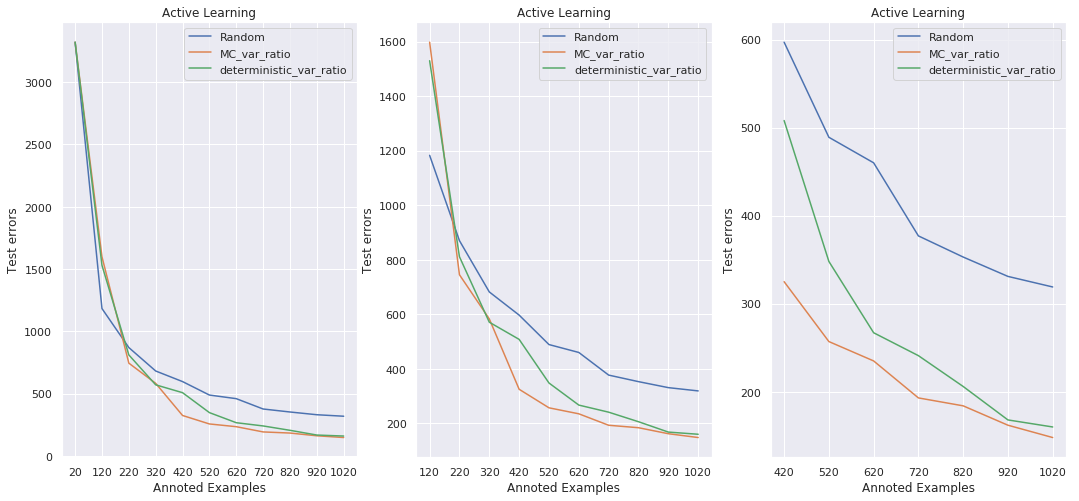

In [29]:
displayLearningConvergence()

# Exercice 4 : Incertitude Spatiale pour la Classification d’Images

## 4.1 - Definition of the Architecture of the network

In [30]:
s= (5,5)
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5),  activation='relu',input_shape=input_shape, padding='valid' ))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(1000, (1, 1), activation='relu', padding='valid'))
model.add(Dropout(0.5))
model.add(Conv2D(10, (1, 1), activation='linear', padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 4, 4, 1000)        33000     
_________________________________________________________________
dropout_10 (Dropout)         (None, 4, 4, 1000)        0         
__________

## 4.2 - Fitting of the model

In [31]:
# Compilator of the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Fitting of the model
model.fit(x_train, Y_train, batch_size=BATCH_SIZE, epochs=30, verbose=1,
          validation_data=(x_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 9s 155us/step - loss: 0.7343 - acc: 0.7595 - val_loss: 0.2083 - val_acc: 0.9403
Epoch 2/30
60000/60000 [==============================] - 8s 140us/step - loss: 0.2477 - acc: 0.9260 - val_loss: 0.1276 - val_acc: 0.9648
Epoch 3/30
60000/60000 [==============================] - 9s 143us/step - loss: 0.1830 - acc: 0.9439 - val_loss: 0.0908 - val_acc: 0.9748
Epoch 4/30
60000/60000 [==============================] - 9s 149us/step - loss: 0.1473 - acc: 0.9544 - val_loss: 0.0718 - val_acc: 0.9774
Epoch 5/30
60000/60000 [==============================] - 10s 162us/step - loss: 0.1264 - acc: 0.9614 - val_loss: 0.0658 - val_acc: 0.9797
Epoch 6/30
60000/60000 [==============================] - 10s 165us/step - loss: 0.1083 - acc: 0.9664 - val_loss: 0.0612 - val_acc: 0.9816
Epoch 7/30
60000/60000 [==============================] - 11s 178us/step - loss: 0.0980 - acc: 0.9702 - val_loss: 0.0534

## 4.3 - MC Predictions by the model

In [32]:
# Number of samples
nS = 100

# Definition of the MC model
MC_output = K.function([model.layers[0].input, K.learning_phase()], [model.layers[-3].output])
learning_phase = True  # use dropout at test time

# Probabilities predicted by the MC model
MC_samples = np.array([MC_output([x_test, learning_phase])[0] for _ in range(nS)])

# Save probabilities predicted
outfile = './Results/MC_predictions_FCN'
np.savez(outfile, MC_samples=MC_samples)

# Compute the predictions
nS = MC_samples.shape[0]
nb_ex =  MC_samples.shape[1]
predictions = np.mean(np.mean(MC_samples.reshape(nS, x_test.shape[0], 16, NB_CLASSES), axis=2),
                      axis=0)
y_preds = np.argmax(predictions, axis=1)

# Number of errors
nb_err_S = np.where(y_preds != y_test, 1.0,0.0).sum()
print("nb errors MC dropout="+str(nb_err_S))

nb errors MC dropout=110.0


## 4.4 - Incertitude Spatiale

In [33]:
# Tensor of size 100x10000x4x4 => logits for predicted (and GT) categories for each region
MC_samples_catpred = np.array([MC_samples[:, i, :, :, y_preds[i]] for i in range(nb_ex)])
MC_samples_cattrue = np.array([MC_samples[:, i, :,:, y_test[i]] for i in range(nb_ex)])

In [34]:
MC_samples_catpred.shape

(10000, 100, 4, 4)

In [38]:
def variance(MC_samples_cat):
    """Compute the variance of every sub region."""
    
    # Reshape MC_samples_cat
    MC_samples_cat = MC_samples_cat.reshape((100, -1))
    
    # Compute cov matrices
    cov = np.cov(MC_samples_cat)
    
    # Compute variance for each sub region
    result = np.array([2 * np.sum(cov[i, :]) - cov[i, i] for i in range(16)])
    
    return result

In [39]:
spatial_variances_pred = np.zeros((nb_ex, 16))
for i in tqdm(range(nb_ex)):
    spatial_variances_pred[i, :] = variance(MC_samples_catpred[i, :, : , :])

spatial_variances_true = np.zeros((nb_ex, 16))
for i in tqdm(range(nb_ex)):
        spatial_variances_true[i, :] = variance(MC_samples_cattrue[i, :, : , :])

100%|██████████| 10000/10000 [00:02<00:00, 4206.49it/s]


## 4.5 - Shwo Result

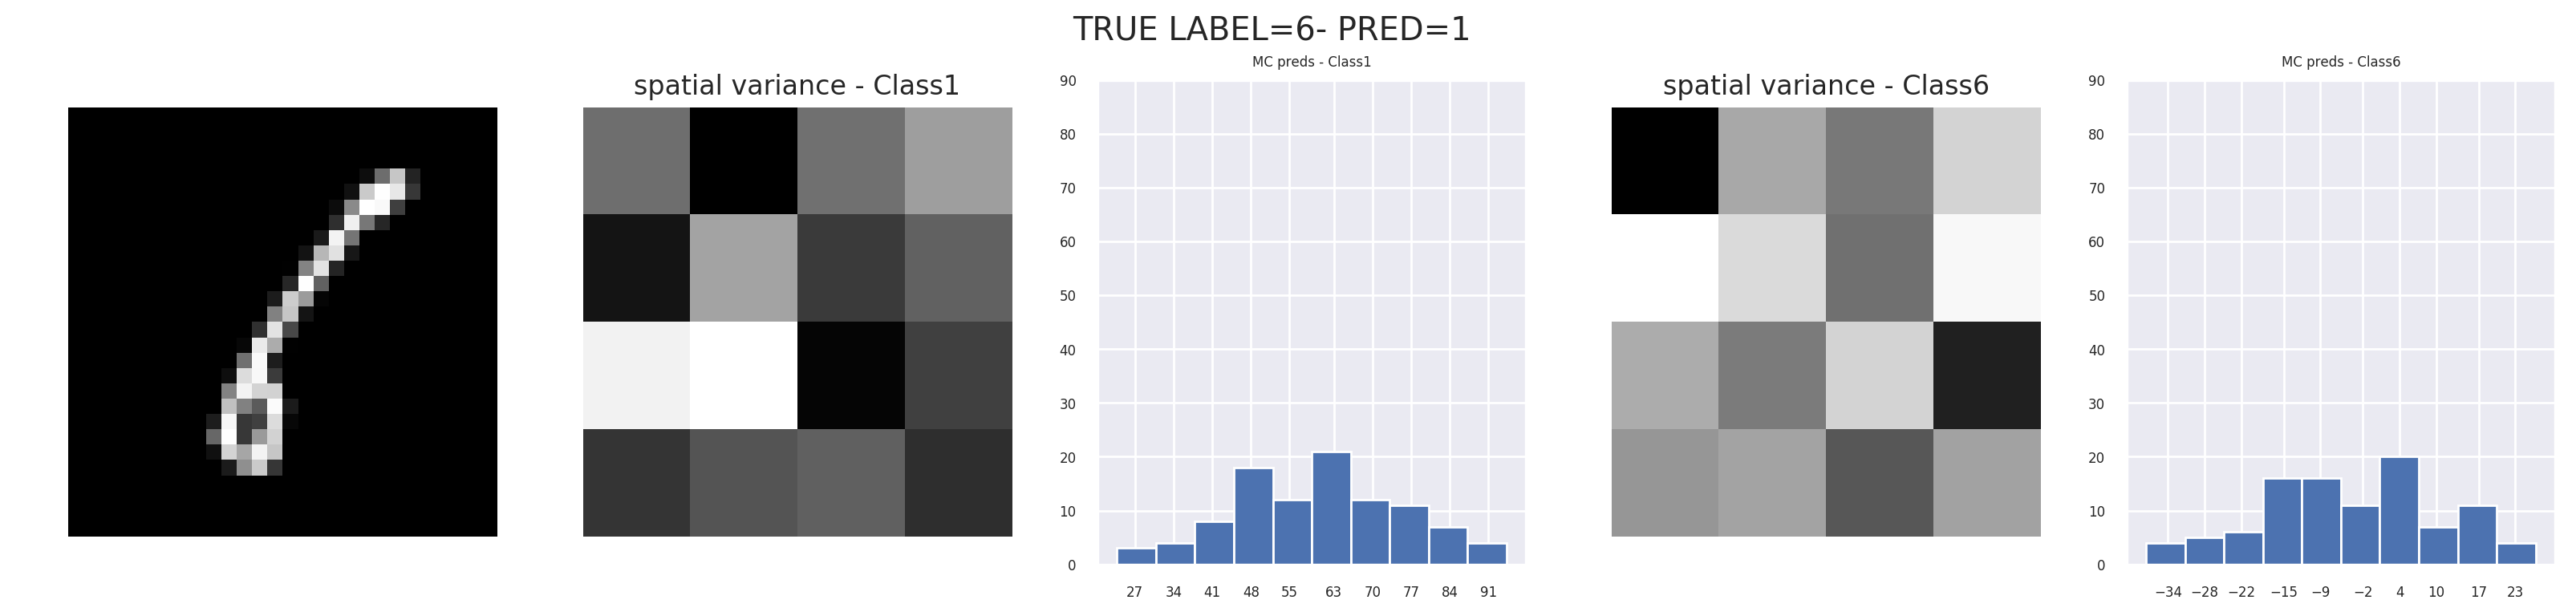

next example ? (0 to stop) - 1


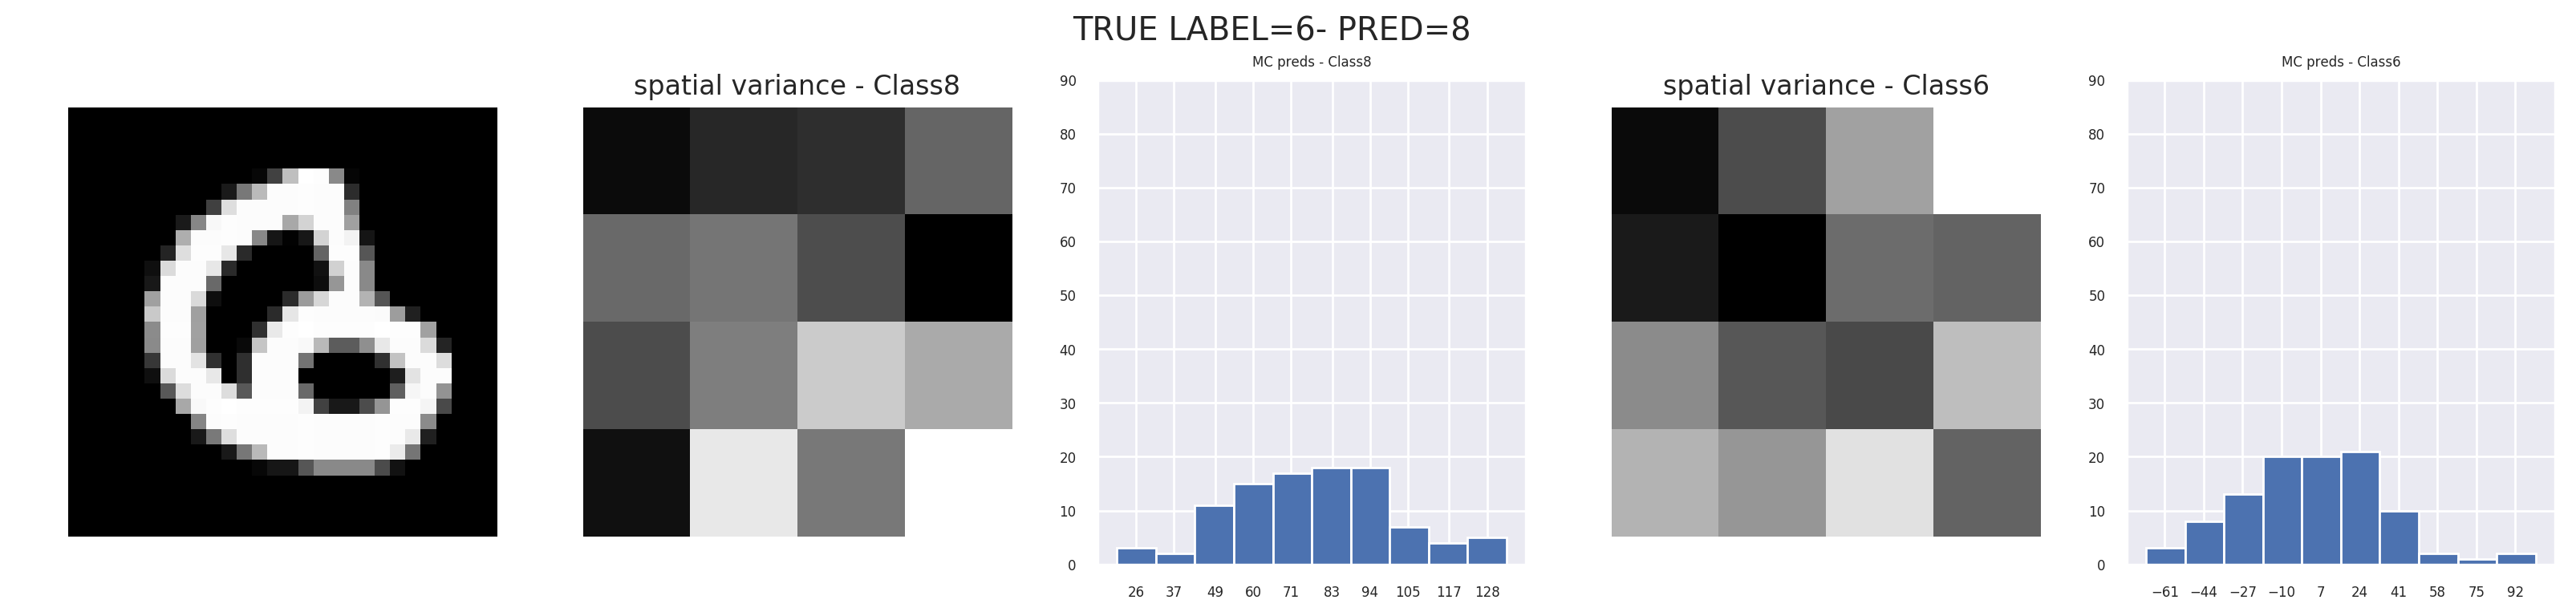

next example ? (0 to stop) - 0


In [40]:
# Number of errors of predictions
errors = np.where(y_preds != y_test)[0]

# Stoping criterion
bStop = False

# Interval on which to extract an image
min = 0
max = len(errors)

size=6
MC_predictions_global = MC_samples.reshape(nS, x_test.shape[0], 16, NB_CLASSES).sum(axis=2)

while bStop == False:
    
    # Extract a misclassified image
    cpt = np.random.randint(min, max)
    index = errors[cpt]
    
    # Compute the variance for this image
    
    # Title of the graphic
    title = "TRUE LABEL=" + str(y_test[index]) + "- PRED=" + str(y_preds[index])
    
    # Extract the image and its variances
    img = x_test[index, :, :, 0].reshape([28,28])
    img_var_pred = spatial_variances_pred[index, :].reshape([4, 4])
    img_var_true = spatial_variances_true[index, :].reshape([4, 4])
    
    # Displat the image
    fig = plt.figure(dpi=200)
    fig.suptitle(title, fontsize="x-large")
    fig.set_figheight(4)
    fig.set_figwidth(4 * 5)
    ax = plt.subplot(151)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
    # Display the pred spatial variance
    ax = plt.subplot(152)
    ax.imshow(img_var_pred, cmap='gray')
    ax.axis('off')
    ax.set_title("spatial variance - Class" + str(y_preds[index]))
    
    # Display histograms of predictions for the predicted label
    ax = plt.subplot(153)
    h1 = ax.hist(MC_predictions_global[:, index, y_preds[index]], 10)
    lims = [np.round((h1[1][i] + h1[1][i+1]) / 2.0) for i in range(10)]
    ax.set_title("MC preds - Class" + str(y_preds[index]))
    ax.set_yticks(np.arange(0, 100, 10))
    ax.set_xticks(lims)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() +
                  ax.get_yticklabels()):
        item.set_fontsize(size)
    
    # Displat the true spatial variance
    ax = plt.subplot(154)
    ax.imshow(img_var_true, cmap='gray')
    ax.axis('off')
    ax.set_title("spatial variance - Class" + str(y_test[index]))
    
    # Display histograms of predictions for the true label
    ax =plt.subplot(155)
    h1 = ax.hist(MC_predictions_global[:, index, y_test[index]], 10)
    lims = [np.round((h1[1][i] + h1[1][i+1]) / 2.0) for i in range(10)]
    ax.set_title("MC preds - Class" + str(y_test[index]))
    ax.set_yticks(np.arange(0, 100, 10))
    ax.set_xticks(lims)
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() +
                 ax.get_yticklabels()):
        item.set_fontsize(size)

    # Show the figures
    plt.show()

    # Test to contine to display misclassified examples
    entry = int(input("next example ? (0 to stop) - "))
    if entry == 0:
        bStop = True